In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [70]:
nb = pd.read_csv('Neighborhoods_Files/pgh_neighborhoods.csv')
nb = nb[['name']]
print(nb.head())

                 name
0  Marshall-Shadeland
1    South Side Flats
2   South Side Slopes
3           Arlington
4       Lincoln Place


In [71]:
greenways = pd.read_csv('greenways.csv')
greenways = greenways['nhood'] # select only the neighborhood column

# we want to count how many instances of each neighborhood are in features. 
# This will be essentially be a 'leaderboard' of water features
nb['greenways'] = pd.Series(0, index=np.arange(len(nb))) # we initialize the leaderboard to all 0's
for row in greenways:
    # get neighborhood index 

    #print(row)
    inds = nb[nb.name == row]
    if len(inds):
        ind = nb[nb.name == row].index[0] # which neighborhood does this feature belong to?
        nb.loc[ind,'greenways'] += 1 # update accordingly
    
nb = nb.sort_values('greenways', ascending=False) # we sort by highest first
print(nb)

                   name  greenways
48          Perry North          1
88            Beechview          1
86  Squirrel Hill South          1
85            Hazelwood          1
46          Perry South          1
..                  ...        ...
28          Morningside          0
27  Upper Lawrenceville          0
26              Oakwood          0
25             Garfield          0
90     Mount Washington          0

[91 rows x 2 columns]


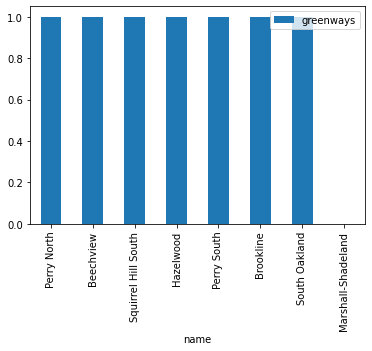

In [72]:
nb = nb[:8]
nb.plot.bar(x='name')